In [21]:
import pandas as pd
df=pd.read_csv("titanic-passengers.csv",sep=";")

In [22]:
df.drop_duplicates()
df.drop(columns='Ticket',inplace=True)
df=df.dropna(subset=['Embarked'])
df['Age'].fillna(df['Age'].mean(),inplace=True)
cabinC=df['Cabin'].value_counts().keys()[0]
df['Cabin'].fillna(cabinC,inplace=True)
df['Sex']=df['Sex'].map({"male":1,"female":0})
df["Survived"]=df["Survived"].map({"Yes":1,"No":0})

In [23]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":       "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

In [24]:
titles=list(Title_Dictionary.keys())
columnTitle=[]
for i,row in df.iterrows():
    for title in titles:
        titlee=title+"."
        if titlee in row["Name"]:
            columnTitle.append(title)
            
df["Title"] = columnTitle
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,343,0,2,"Collander, Mr. Erik Gustaf",1,28.0,0,0,13.0000,B96 B98,S,Mr
1,76,0,3,"Moen, Mr. Sigurd Hansen",1,25.0,0,0,7.6500,F G73,S,Mr
2,641,0,3,"Jensen, Mr. Hans Peder",1,20.0,0,0,7.8542,B96 B98,S,Mr
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.0,0,4,21.0750,B96 B98,S,Mrs
4,672,0,1,"Davidson, Mr. Thornton",1,31.0,1,0,52.0000,B71,S,Mr


In [25]:
df.drop(columns='Name',inplace=True)

In [26]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,343,0,2,1,28.000000,0,0,13.0000,B96 B98,S,Mr
1,76,0,3,1,25.000000,0,0,7.6500,F G73,S,Mr
2,641,0,3,1,20.000000,0,0,7.8542,B96 B98,S,Mr
3,568,0,3,0,29.000000,0,4,21.0750,B96 B98,S,Mrs
4,672,0,1,1,31.000000,1,0,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,0,14.000000,1,0,30.0708,B96 B98,C,Mrs
887,61,0,3,1,22.000000,0,0,7.2292,B96 B98,C,Mr
888,535,0,3,0,30.000000,0,0,8.6625,B96 B98,S,Miss
889,102,0,3,1,29.642093,0,0,7.8958,B96 B98,S,Mr


In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(df["Cabin"])
df["CabinEnc"]=le.transform(df["Cabin"])

le = preprocessing.LabelEncoder()

le.fit(df['Embarked'])
df['EmbarkedEncod']=le.transform(df['Embarked'])

le = preprocessing.LabelEncoder()

le.fit(df['Title'])
df['TitleEncod']=le.transform(df['Title'])

df.drop(columns=['Title','Cabin','Embarked'],inplace=True)
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,CabinEnc,EmbarkedEncod,TitleEncod
0,343,0,2,1,28.0,0,0,13.0000,46,2,11
1,76,0,3,1,25.0,0,0,7.6500,139,2,11
2,641,0,3,1,20.0,0,0,7.8542,46,2,11
3,568,0,3,0,29.0,0,4,21.0750,46,2,12
4,672,0,1,1,31.0,1,0,52.0000,37,2,11


In [33]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'CabinEnc', 'EmbarkedEncod', 'TitleEncod'],
      dtype='object')

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#features extraction
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'CabinEnc', 'EmbarkedEncod', 'TitleEncod']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0,stratify=y)  #splitting data with test size of 25%

logreg = LogisticRegression()   #build our logistic model
logreg.fit(x_train, y_train)  #fitting training data
y_pred  = logreg.predict(x_test)    #testing model’s performance
print("Score={:.2f}".format(logreg.score(x_test, y_test)))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

Score=0.78
0.7847533632286996
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       148
           1       0.66      0.75      0.70        75

    accuracy                           0.78       223
   macro avg       0.76      0.78      0.77       223
weighted avg       0.79      0.78      0.79       223



C:\Users\GUERBOUB MHAMED\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

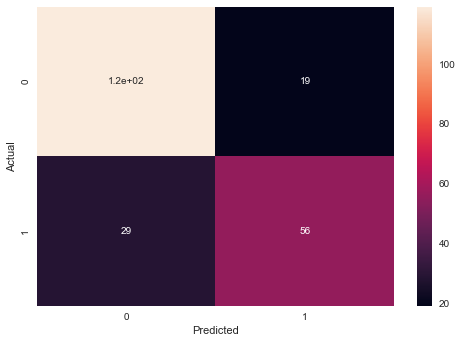

In [63]:
import seaborn as sns
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [52]:
from sklearn.metrics import roc_auc_score
pred_prob = logreg.predict_proba(x_test)
# auc scores
auc_score= roc_auc_score(y_test, pred_prob[:,1])

print(auc_score)

0.8317135549872123


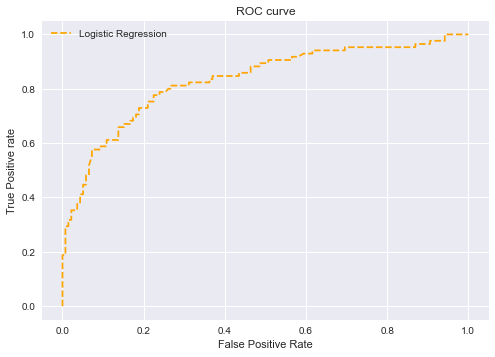

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
plt.style.use('seaborn')

fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
# plot roc curves
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')

# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();